In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import re
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sb
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
nba = pd.read_csv("nba.csv")

In [5]:
season_1415 = nba[nba["Year"] == 2014.0] # new dataset for data for 2014-15 season

In [6]:
season_1415

,Unnamed: 0,Player,Year,Age,Pos,Year in League,Tm,MP,FG,FGA,...,3P,3PA,TRB,AST,PF,TOV,Year Started,Year Ended,Height,Weight
5603,5603,Aaron Brooks,2014.0,29.0,PG,7.0,TOT,1557.0,233.0,581.0,...,96.0,248.0,140.0,233.0,146.0,117.0,2008,2018,72.0,161.0
5604,5604,Aaron Gray,2014.0,29.0,C,7.0,TOT,355.0,27.0,61.0,...,0.0,1.0,111.0,22.0,64.0,31.0,2008,2014,84.0,270.0
5605,5605,Al Harrington,2014.0,33.0,PF,16.0,WAS,511.0,82.0,207.0,...,34.0,100.0,80.0,28.0,72.0,34.0,1999,2014,81.0,230.0
5606,5606,Al Horford,2014.0,27.0,C,7.0,ATL,958.0,238.0,420.0,...,4.0,11.0,244.0,76.0,56.0,64.0,2008,2018,82.0,245.0
5607,5607,Al Jefferson,2014.0,29.0,C,10.0,CHA,2553.0,700.0,1376.0,...,3.0,15.0,792.0,155.0,176.0,124.0,2005,2018,82.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,6019,Willie Green,2014.0,32.0,SG,11.0,LAC,869.0,102.0,271.0,...,41.0,121.0,78.0,50.0,96.0,34.0,2004,2015,76.0,200.0
6020,6020,Wilson Chandler,2014.0,26.0,SF,7.0,DEN,1927.0,307.0,738.0,...,122.0,351.0,294.0,114.0,193.0,79.0,2008,2018,80.0,225.0
6021,6021,Xavier Henry,2014.0,22.0,SF,4.0,LAL,908.0,144.0,345.0,...,28.0,81.0,114.0,51.0,79.0,57.0,2011,2015,78.0,220.0
6022,6022,Zach Randolph,2014.0,32.0,PF,13.0,MEM,2705.0,560.0,1198.0,...,2.0,20.0,795.0,200.0,210.0,183.0,2002,2018,81.0,260.0


In [7]:
#define functions below
def mean(data):
    return sum(data)/len(data)

def variance(data):
    ss = 0
    for x in data:
        ss += (x - mean(data))**2
    var = ss/(len(data))
    return var

def covariance(x, y):
    mean_x = mean(x)
    mean_y = mean(y)
    n = len(x)
    return np.sum((x-mean_x)*(y-mean_y)) / (n)

def sd(x):
    return np.sqrt(variance(x))

def correlation(x, y):
    return covariance(x, y) / (sd(x)*sd(y))

def std_resid(X, Y, slope, intercept):
    resid = X - ((slope*Y)+intercept)
    sd_resid = np.sqrt(np.sum(resid**2)/len(X))
    return sd_resid

In [8]:
# summary statistics for our variables
for i in season_1415[["MP", "PF", "FGA", "AST", "TRB", "Year in League", "TOV"]]:
    print(i, ":")
    print("Mean:", mean(season_1415[i]))
    print("Variance:", variance(season_1415[i]))
    print("Std. Deviation:", sd(season_1415[i]), "\n")

MP :
Mean: 1378.5676959619952
Variance: 709724.4781963546
Std. Deviation: 842.4514693419168 

PF :
Mean: 118.07125890736341
Variance: 4332.2277012655095
Std. Deviation: 65.81966044629453 

FGA :
Mean: 473.353919239905
Variance: 129596.96500245434
Std. Deviation: 359.9957847009522 

AST :
Mean: 126.41805225653206
Variance: 17799.530695493693
Std. Deviation: 133.41488183667403 

TRB :
Mean: 244.375296912114
Variance: 39014.14418785724
Std. Deviation: 197.51998427464812 

Year in League :
Mean: 5.98812351543943
Variance: 18.049740184268863
Std. Deviation: 4.248498580000806 

TOV :
Mean: 80.47030878859857
Variance: 3777.612538859521
Std. Deviation: 61.46228549980484 



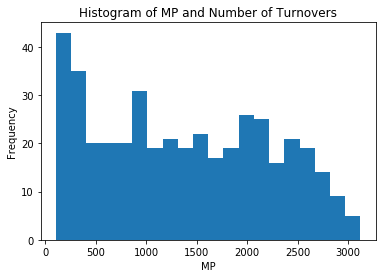

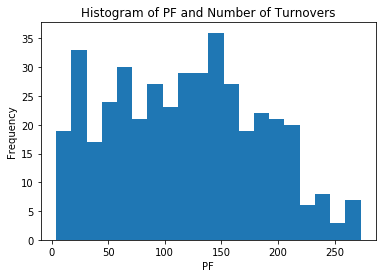

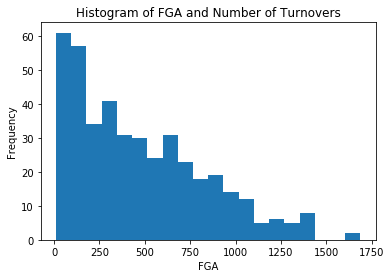

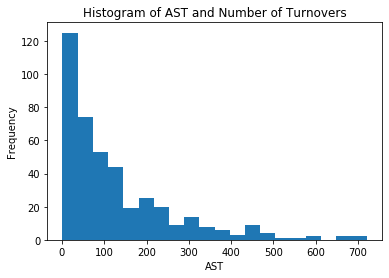

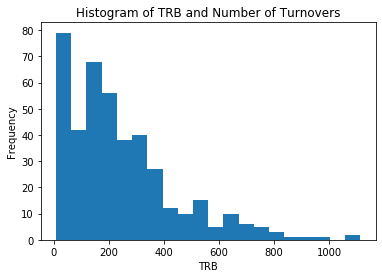

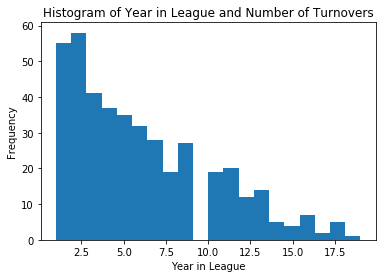

In [9]:
#histograms of our independent variables
for i in season_1415[["MP", "PF", "FGA", "AST", "TRB", "Year in League"]]:
    plt.hist(season_1415[i], bins = 20)
    plt.title("Histogram of " + i + " and Number of Turnovers")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

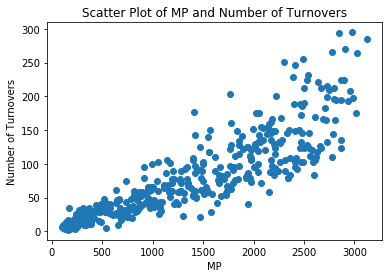

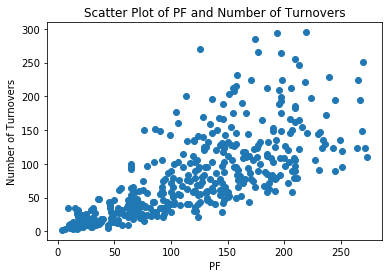

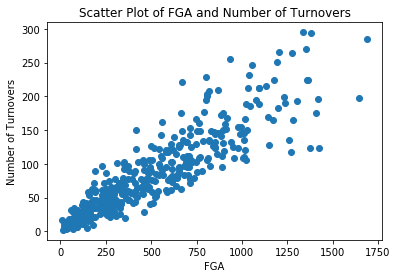

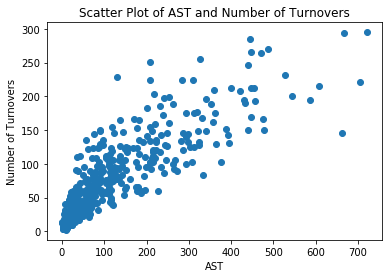

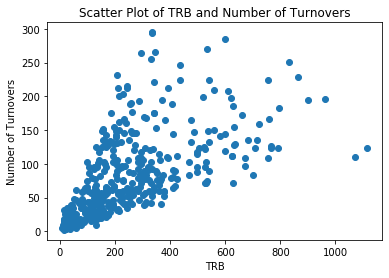

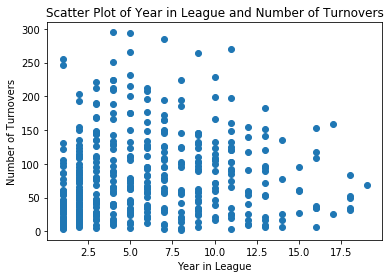

In [10]:
# scatter plots for each independent variable against TOV
for i in season_1415[["MP", "PF", "FGA", "AST", "TRB", "Year in League"]]:
    plt.scatter(season_1415[i], season_1415["TOV"])
    plt.title("Scatter Plot of " + i + " and Number of Turnovers")
    plt.xlabel(i)
    plt.ylabel("Number of Turnovers")
    plt.show()

In [11]:
#correlation and covariance between each indedepent variable and TOV
for i in season_1415[["MP", "PF", "FGA", "AST", "TRB", "Year in League"]]:
    print(i + " and TOV:")
    print("Correlation:", np.corrcoef(season_1415[i], season_1415["TOV"])[0][1])
    print("Covariance:", covariance(season_1415[i], season_1415["TOV"]), "\n")

MP and TOV:
Correlation: 0.866133527189234
Covariance: 44847.52160617465 

PF and TOV:
Correlation: 0.7275385736200055
Covariance: 2943.2040160008123 

FGA and TOV:
Correlation: 0.89619237105453
Covariance: 19829.29910686579 

AST and TOV:
Correlation: 0.8415094869574895
Covariance: 6900.363956420918 

TRB and TOV:
Correlation: 0.6232054979932049
Covariance: 7565.733233281238 

Year in League and TOV:
Correlation: 0.0743033066942392
Covariance: 19.40226019938953 



In [12]:
#linear regression for each indepedent variable with TOV
for i in season_1415[["MP", "PF", "FGA", "AST", "TRB", "Year in League"]]:
    print(i + " and TOV:")
    model = LinearRegression().fit(season_1415[[i]], season_1415[['TOV']])
    predictions = model.predict(season_1415[[i]])
    ssr = ((season_1415[["TOV"]] - predictions)**2).sum()
    print("Slope:", float(model.coef_))
    print("Intercept:", float(model.intercept_))
    print("R^2:", model.score(season_1415[[i]], season_1415[['TOV']]))
    print("SSR: ", ssr[0], "\n")

MP and TOV:
Slope: 0.06319004484690606
Intercept: -6.641445743735872
R^2: 0.7501872869212628
SSR:  397295.8633002491 

PF and TOV:
Slope: 0.6793742663020824
Intercept: 0.25573389704534577
R^2: 0.529312376105032
SSR:  748569.7728327939 

FGA and TOV:
Slope: 0.15300743429053507
Intercept: 8.043640094331565
R^2: 0.80316076593634
SSR:  313048.1730288605 

AST and TOV:
Slope: 0.3876711175406371
Intercept: 31.461681192998128
R^2: 0.7081382166394565
SSR:  464169.6483558463 

TRB and TOV:
Slope: 0.19392282954744394
Intercept: 33.08035973990469
R^2: 0.38838509272895844
SSR:  972696.9840600657 

Year in League and TOV:
Slope: 1.0749329353947954
Intercept: 74.03347760064067
R^2: 0.0055209813856980094
SSR:  1581594.4487573905 



In [13]:
# Variance Inflation Factor
new_df = season_1415[["MP", "FGA", "TRB", "AST", "PF"]]
vif = pd.DataFrame()
vif["features"] = new_df.columns
vif["VIF Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
print(vif)

  features  VIF Factor
0       MP   49.918620
1      FGA   21.020305
2      TRB    7.948257
3      AST    5.238638
4       PF   18.277892


In [14]:
# Variance Inflation Factor Without MP
new_df = season_1415[["FGA", "TRB", "AST", "PF"]]
vif = pd.DataFrame()
vif["features"] = new_df.columns
vif["VIF Factor"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
print(vif)

  features  VIF Factor
0      FGA   11.478945
1      TRB    7.691246
2      AST    4.569509
3       PF   10.000821


In [15]:
# new dataframe with columns divided by MP
new_season_1415 = season_1415
new_season_1415[["TOV","AST","FGA","TRB","PF"]] = new_season_1415[["TOV","AST","FGA","TRB","PF"]].div(new_season_1415["MP"].values, axis=0)
new_season_1415

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Player,Year,Age,Pos,Year in League,Tm,MP,FG,FGA,...,3P,3PA,TRB,AST,PF,TOV,Year Started,Year Ended,Height,Weight
5603,5603,Aaron Brooks,2014.0,29.0,PG,7.0,TOT,1557.0,233.0,0.373154,...,96.0,248.0,0.089917,0.149647,0.093770,0.075145,2008,2018,72.0,161.0
5604,5604,Aaron Gray,2014.0,29.0,C,7.0,TOT,355.0,27.0,0.171831,...,0.0,1.0,0.312676,0.061972,0.180282,0.087324,2008,2014,84.0,270.0
5605,5605,Al Harrington,2014.0,33.0,PF,16.0,WAS,511.0,82.0,0.405088,...,34.0,100.0,0.156556,0.054795,0.140900,0.066536,1999,2014,81.0,230.0
5606,5606,Al Horford,2014.0,27.0,C,7.0,ATL,958.0,238.0,0.438413,...,4.0,11.0,0.254697,0.079332,0.058455,0.066806,2008,2018,82.0,245.0
5607,5607,Al Jefferson,2014.0,29.0,C,10.0,CHA,2553.0,700.0,0.538974,...,3.0,15.0,0.310223,0.060713,0.068939,0.048570,2005,2018,82.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,6019,Willie Green,2014.0,32.0,SG,11.0,LAC,869.0,102.0,0.311853,...,41.0,121.0,0.089758,0.057537,0.110472,0.039125,2004,2015,76.0,200.0
6020,6020,Wilson Chandler,2014.0,26.0,SF,7.0,DEN,1927.0,307.0,0.382979,...,122.0,351.0,0.152569,0.059159,0.100156,0.040996,2008,2018,80.0,225.0
6021,6021,Xavier Henry,2014.0,22.0,SF,4.0,LAL,908.0,144.0,0.379956,...,28.0,81.0,0.125551,0.056167,0.087004,0.062775,2011,2015,78.0,220.0
6022,6022,Zach Randolph,2014.0,32.0,PF,13.0,MEM,2705.0,560.0,0.442884,...,2.0,20.0,0.293900,0.073937,0.077634,0.067652,2002,2018,81.0,260.0


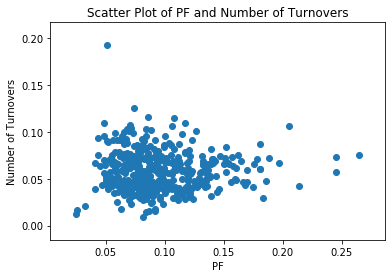

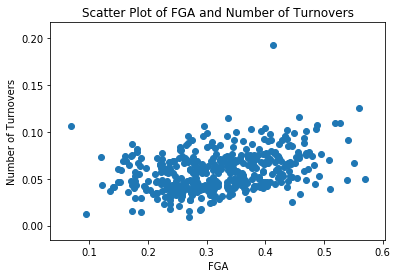

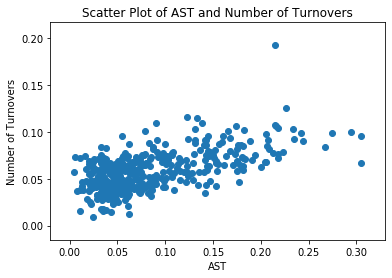

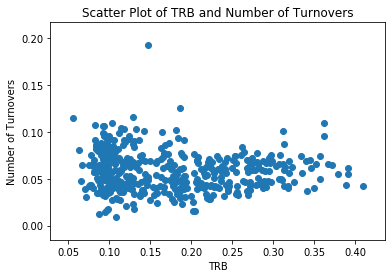

In [16]:
for i in new_season_1415[["PF", "FGA", "AST", "TRB"]]:
    plt.scatter(new_season_1415[i], new_season_1415["TOV"])
    plt.title("Scatter Plot of " + i + " and Number of Turnovers")
    plt.xlabel(i)
    plt.ylabel("Number of Turnovers")
    plt.show()

In [17]:
#correlation between independent variables and TOV after dividing by MP
for i in new_season_1415[["PF", "FGA", "AST", "TRB"]]:
    print(i + " and TOV:")
    print("Correlation:", np.corrcoef(new_season_1415[i], new_season_1415["TOV"])[0][1], "\n")

PF and TOV:
Correlation: 0.003025342259168994 

FGA and TOV:
Correlation: 0.3504552538262594 

AST and TOV:
Correlation: 0.610118193694876 

TRB and TOV:
Correlation: -0.06674065217051602 



In [23]:
#spearman correlation
for i in new_season_1415[["PF", "FGA", "AST", "TRB"]]:
    spearman_r = spearmanr(new_season_1415[i], new_season_1415["TOV"])
    print(i + ' Spearman r: {:.4f}'.format(spearman_r.correlation))

PF Spearman r: -0.0192
FGA Spearman r: 0.3516
AST Spearman r: 0.5543
TRB Spearman r: -0.0782


In [24]:
for i in new_season_1415[["PF","TRB"]]:
    print(i + " and TOV:")
    model = LinearRegression().fit(new_season_1415[[i]], new_season_1415[['TOV']])
    predictions = model.predict(new_season_1415[[i]])
    ssr = ((new_season_1415[["TOV"]] - predictions)**2).sum()
    print("Slope:", float(model.coef_))
    print("Intercept:", float(model.intercept_))
    print("R^2:", model.score(new_season_1415[[i]], new_season_1415[['TOV']]))
    print("SSR: ", ssr[0], "\n")

PF and TOV:
Slope: 0.0018383641002423553
Intercept: 0.05754369581856138
R^2: 9.152695785163978e-06
SSR:  0.1894117139552242 

TRB and TOV:
Slope: -0.017447567349270818
Intercept: 0.06081742732031333
R^2: 0.004454314652145852
SSR:  0.1885697405039345 



In [25]:
#WITHOUT MP
new_df_fif = new_season_1415[["FGA", "AST"]]
vif2 = pd.DataFrame()
vif2["features"] = new_df_fif.columns
vif2["VIF Factor"] = [variance_inflation_factor(new_df_fif.values, i) for i in range(new_df_fif.shape[1])]
print(vif2)

  features  VIF Factor
0      FGA    3.275453
1      AST    3.275453


In [26]:
#linear regression
for i in new_season_1415[["FGA", "AST"]]:
    print(i + " and TOV:")
    model = LinearRegression().fit(new_season_1415[[i]], new_season_1415[['TOV']])
    predictions = model.predict(new_season_1415[[i]])
    ssr = ((new_season_1415[["TOV"]] - predictions)**2).sum()
    print("Slope:", float(model.coef_))
    print("Intercept:", float(model.intercept_))
    print("R^2:", model.score(new_season_1415[[i]], new_season_1415[['TOV']]))
    print("SSR: ", ssr[0], "\n")

FGA and TOV:
Slope: 0.08210987393829855
Intercept: 0.031373383896575555
R^2: 0.12281888493442773
SSR:  0.16614989917320663 

AST and TOV:
Slope: 0.22344332272747597
Intercept: 0.03907503643177922
R^2: 0.37224421027749777
SSR:  0.11890538838150153 



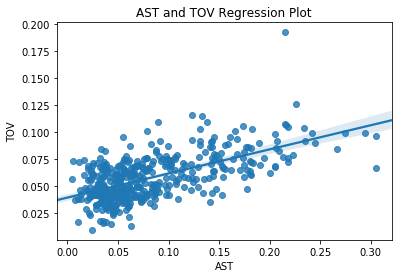

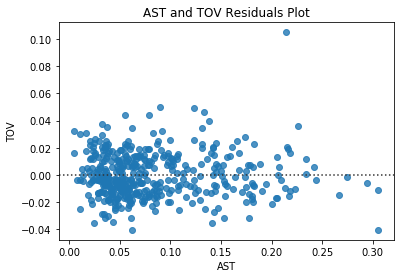

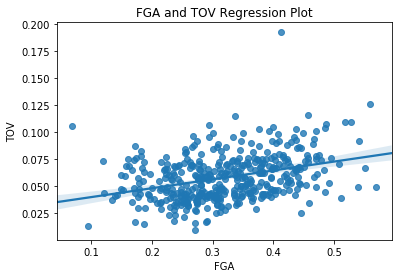

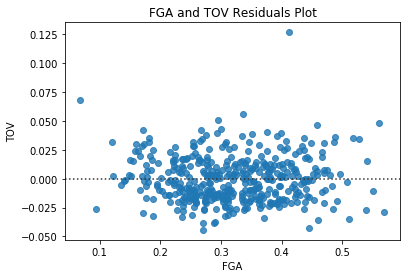

In [29]:
#residual plots
sb.regplot("AST","TOV", data = new_season_1415)
plt.title("AST and TOV Regression Plot")
plt.show()
sb.residplot(new_season_1415["AST"], new_season_1415["TOV"])
plt.title("AST and TOV Residuals Plot")
plt.show()
sb.regplot("FGA","TOV", data = new_season_1415)
plt.title("FGA and TOV Regression Plot")
plt.show()
sb.residplot(new_season_1415["FGA"], new_season_1415["TOV"])
plt.title("FGA and TOV Residuals Plot")
plt.show()

In [30]:
#multivariate linear regression
X2 = new_season_1415[["AST","FGA"]]
Y2 = new_season_1415[["TOV"]]
regr2 = LinearRegression().fit(X2, Y2)
print("Slopes:", regr2.coef_[0])
print("Intercept:", float(regr2.intercept_))
print("R^2 score:", regr2.score(X2, Y2))

Slopes: [0.20350874 0.04606714]
Intercept: 0.025957487611330203
R^2 score: 0.4079409301188911


Assists:


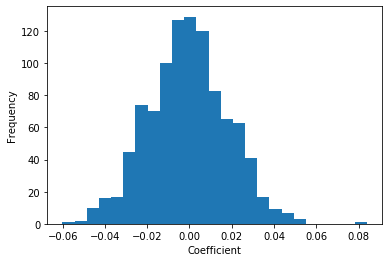

Field Goal Attempts:


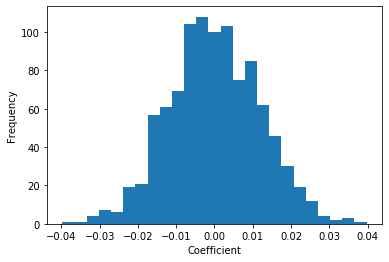

In [36]:
#permutation to check if our results were generated from a random process
def permuted_y():
    return np.random.permutation(new_season_1415["TOV"].copy())

array = np.zeros((1000, 2))
for i in range(1000):
    model = LinearRegression().fit(new_season_1415[["AST","FGA"]], permuted_y()) 
    array[i, :] = model.coef_

print("Assists:")
plt.hist(array[:, 0], bins=25)
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()
print("Field Goal Attempts:")
plt.hist(array[:, 1], bins=25)
plt.xlabel("Coefficient")
plt.ylabel("Frequency")
plt.show()

In [37]:
#ols regression
X2 = sm.add_constant(X2) # adding a constant
 
model2 = sm.OLS(Y2, X2).fit()
predictions = model2.predict(X2) 
 
print_model = model2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    TOV   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 19 May 2020   Prob (F-statistic):           2.66e-48
Time:                        12:56:34   Log-Likelihood:                 1135.2
No. Observations:                 421   AIC:                            -2264.
Df Residuals:                     418   BIC:                            -2252.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0260      0.003      8.757      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
